In [306]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import deque
import sys

In [308]:
def get_left_side(frame, check_size=10, min_mean_pixel=0.03):
    for c in range(0, frame.shape[1], check_size):
        mean_pixel = cv2.mean(frame[:,c:c+check_size])[0]
        if mean_pixel > min_mean_pixel:
            return c
    return 0

def get_right_side(frame, check_size=10, min_mean_pixel=0.03):
    for c in range(frame.shape[1], 0, -(check_size)):
        mean_pixel = cv2.mean(frame[:, c-check_size:c])[0]
        if mean_pixel > min_mean_pixel:
            return c
    return 0

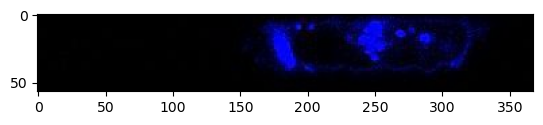

In [394]:
frame = cv2.imread("movies/movie2/12.jpg")
img_raw = frame[38:95, :]

plt.imshow(img_raw)

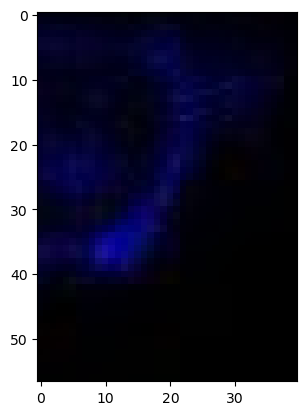

In [396]:
img_gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)

right_end = get_right_side(img_gray, check_size=3, min_mean_pixel=1)
left_end = get_left_side(img_gray, check_size=3, min_mean_pixel=1)

right_section = img_raw[:, right_end-40:right_end]

cv2.rectangle(img_gray, (left_end, 0), (right_end, 95), (0, 0, 255), 1)

plt.imshow(right_section)
#print(right_end)

In [398]:
#brightness = 2
#contrast = 1.5
#right_img_contrast = cv2.addWeighted(right_section, contrast, np.zeros(right_section.shape, right_section.dtype), 0, brightness)

#plt.imshow(right_img_contrast)
#print(right_img_contrast)

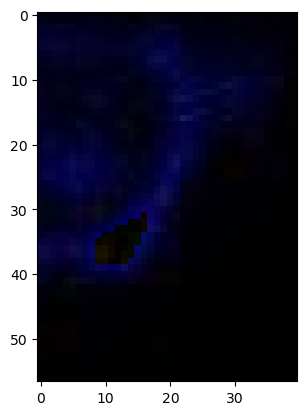

In [400]:
remove_thresh = cv2.threshold(right_section, 105, 255, cv2.THRESH_BINARY)[1]

diff_img = cv2.subtract(right_section, remove_thresh)

remove_thresh_mask = remove_thresh[remove_thresh>0]

plt.imshow(diff_img)

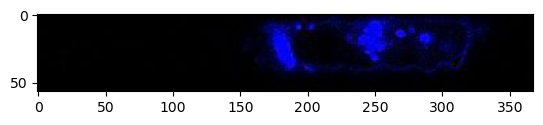

In [402]:
img_raw[:, right_end-40:right_end] = diff_img
plt.imshow(img_raw)